<a href="https://colab.research.google.com/github/Arifulhaque-02128/ML_Projects/blob/main/flood_prediction_in_bangladesh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/NLP/Project/Flood Prediction in Bangladesh/FloodPrediction.csv')
df.tail()

,Sl,Station_Names,Year,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Station_Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Period,Flood?
20539,20539,Teknaf,2013,8,32.5,25.4,851.0,88.0,2.5,6.2,3.8,41998,734765.4,308914.1,20.87,92.26,4,2013.08,1.0
20540,20540,Teknaf,2013,9,32.6,25.7,329.0,88.0,3.0,6.1,4.2,41998,734765.4,308914.1,20.87,92.26,4,2013.09,NaN
20541,20541,Teknaf,2013,10,33.1,24.8,271.0,85.0,2.5,4.4,5.6,41998,734765.4,308914.1,20.87,92.26,4,2013.10,NaN
20542,20542,Teknaf,2013,11,32.5,20.0,0.0,79.0,2.1,1.7,8.4,41998,734765.4,308914.1,20.87,92.26,4,2013.11,NaN
20543,20543,Teknaf,2013,12,29.9,16.5,0.0,72.0,3.0,0.9,8.1,41998,734765.4,308914.1,20.87,92.26,4,2013.12,NaN


In [5]:
df.isnull().sum()

Sl                       0
Station_Names            0
Year                     0
Month                    0
Max_Temp                 0
Min_Temp                 0
Rainfall                 0
Relative_Humidity        0
Wind_Speed               0
Cloud_Coverage           0
Bright_Sunshine          0
Station_Number           0
X_COR                    0
Y_COR                    0
LATITUDE                 0
LONGITUDE                0
ALT                      0
Period                   0
Flood?               16051
dtype: int64

In [7]:
print(df.shape)


(20544, 19)


In [8]:
df.describe()

,Sl,Year,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Station_Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Period,Flood?
count,20544.000000,20544.000000,20544.000000,20544.000000,20544.000000,20544.000000,20544.000000,20544.000000,20544.000000,20544.000000,20544.000000,20544.000000,20544.000000,20544.000000,20544.000000,20544.000000,20544.000000,4493.000000
mean,10271.500000,1985.332944,6.500000,33.450739,21.166872,198.776621,79.497375,1.415049,3.485827,6.419056,41935.098131,549703.189176,579280.955958,23.326647,90.493193,13.357477,1985.397944,0.919653
std,5930.686301,17.610799,3.452137,2.956401,4.949587,240.693197,7.667925,1.042454,2.083791,1.747959,36.516932,116032.076255,130616.053201,1.155241,1.108720,13.529530,17.610832,0.271860
min,0.000000,1948.000000,1.000000,21.600000,6.200000,0.000000,34.000000,0.000000,0.000000,0.000000,41859.000000,0.000000,0.000000,20.870000,88.560000,0.000000,1948.010000,0.000000
25%,5135.750000,1972.000000,3.750000,31.700000,16.900000,8.000000,75.000000,0.700000,1.600000,4.965517,41909.000000,435303.700000,504500.300000,22.640000,89.550000,4.000000,1972.050000,1.000000
50%,10271.500000,1987.000000,6.500000,33.900000,23.400000,111.000000,81.000000,1.200000,3.300000,6.800000,41941.000000,540098.600000,561770.300000,23.170000,90.410000,7.000000,1987.040000,1.000000
75%,15407.250000,2000.000000,9.250000,35.400000,25.400000,312.000000,85.000000,1.900000,5.500000,7.800000,41963.000000,650012.100000,687095.900000,24.290000,91.460000,19.000000,2000.092500,1.000000
max,20543.000000,2013.000000,12.000000,44.000000,28.100000,2072.000000,97.000000,11.200000,7.900000,11.000000,41998.000000,734765.400000,844822.300000,25.720000,92.260000,63.000000,2013.120000,1.000000


In [16]:
df['Flood?'].replace([ np.nan, 1.0], [0,1],inplace=True)

In [18]:
df.tail()

,Sl,Station_Names,Year,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Station_Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Period,Flood?
20539,20539,Teknaf,2013,8,32.5,25.4,851.0,88.0,2.5,6.2,3.8,41998,734765.4,308914.1,20.87,92.26,4,2013.08,1.0
20540,20540,Teknaf,2013,9,32.6,25.7,329.0,88.0,3.0,6.1,4.2,41998,734765.4,308914.1,20.87,92.26,4,2013.09,0.0
20541,20541,Teknaf,2013,10,33.1,24.8,271.0,85.0,2.5,4.4,5.6,41998,734765.4,308914.1,20.87,92.26,4,2013.10,0.0
20542,20542,Teknaf,2013,11,32.5,20.0,0.0,79.0,2.1,1.7,8.4,41998,734765.4,308914.1,20.87,92.26,4,2013.11,0.0
20543,20543,Teknaf,2013,12,29.9,16.5,0.0,72.0,3.0,0.9,8.1,41998,734765.4,308914.1,20.87,92.26,4,2013.12,0.0


In [19]:
df['Year'].unique()

array([1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
       1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 1948])

In [20]:
df['Station_Names'].unique()

array(['Barisal', 'Bhola', 'Bogra', 'Chandpur',
       'Chittagong (City-Ambagan)', 'Chittagong (IAP-Patenga)', 'Comilla',
       "Cox's Bazar", 'Dhaka', 'Dinajpur', 'Faridpur', 'Feni', 'Hatiya',
       'Ishurdi', 'Jessore', 'Khepupara', 'Khulna', 'Kutubdia',
       'Madaripur', 'Maijdee Court', 'Mongla', 'Mymensingh', 'Patuakhali',
       'Rajshahi', 'Rangamati', 'Rangpur', 'Sandwip', 'Satkhira',
       'Sitakunda', 'Srimangal', 'Sylhet', 'Tangail', 'Teknaf'],
      dtype=object)

In [32]:
df['Month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

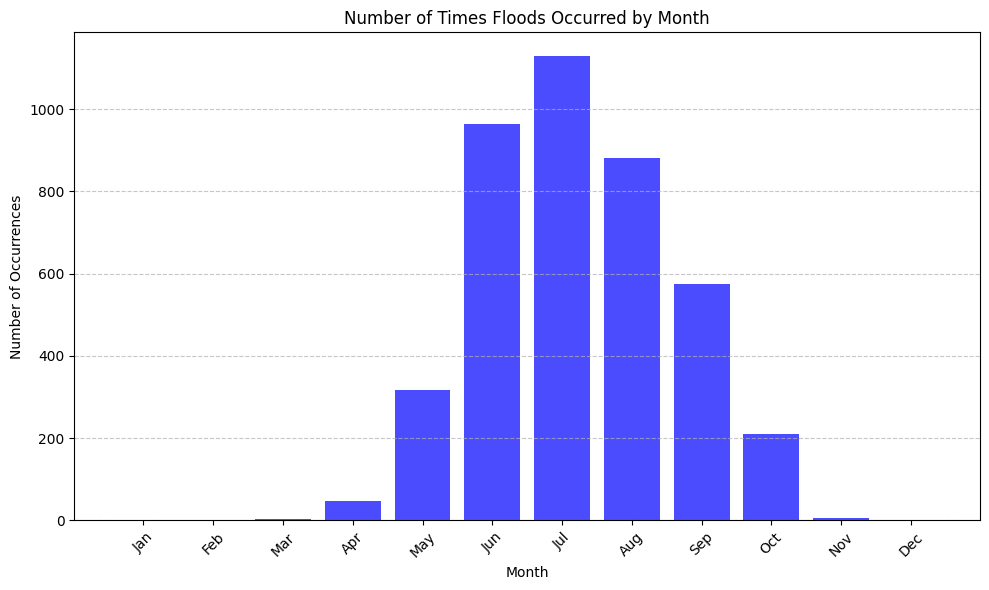

In [37]:
# Filter data where floods occurred
flood_occurred = df[df['Flood?'] == 1]

# Count occurrences of floods by month
flood_counts = flood_occurred['Month'].value_counts().sort_index()

# Ensure all months are included (fill missing months with count of 0)
flood_counts = flood_counts.reindex(range(1, 13), fill_value=0)

# Define month names for the x-axis labels
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Plotting the counts of floods per month
plt.figure(figsize=(10, 6))
plt.bar(range(1, 13), flood_counts, color='blue', alpha=0.7)
plt.title('Number of Times Floods Occurred by Month')
plt.xlabel('Month')
plt.ylabel('Number of Occurrences')

# Set x-axis labels using the numeric values and corresponding month names
plt.xticks(range(1, 13), month_names, rotation=45)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

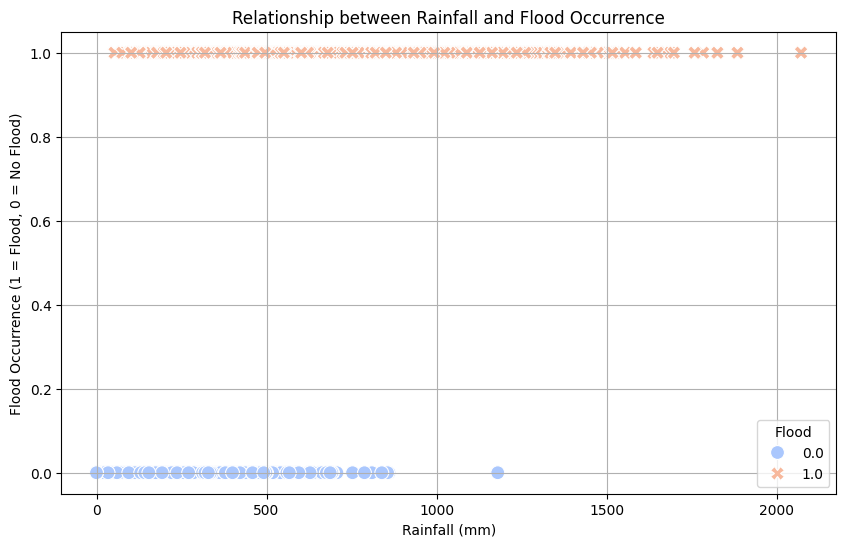

In [41]:
# Plot the relationship between Rainfall and Flood occurrence
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Rainfall', y='Flood?', hue='Flood?', style='Flood?', s=100, palette='coolwarm')
plt.title('Relationship between Rainfall and Flood Occurrence')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Flood Occurrence (1 = Flood, 0 = No Flood)')
plt.legend(title='Flood')
plt.grid(True)
plt.show()

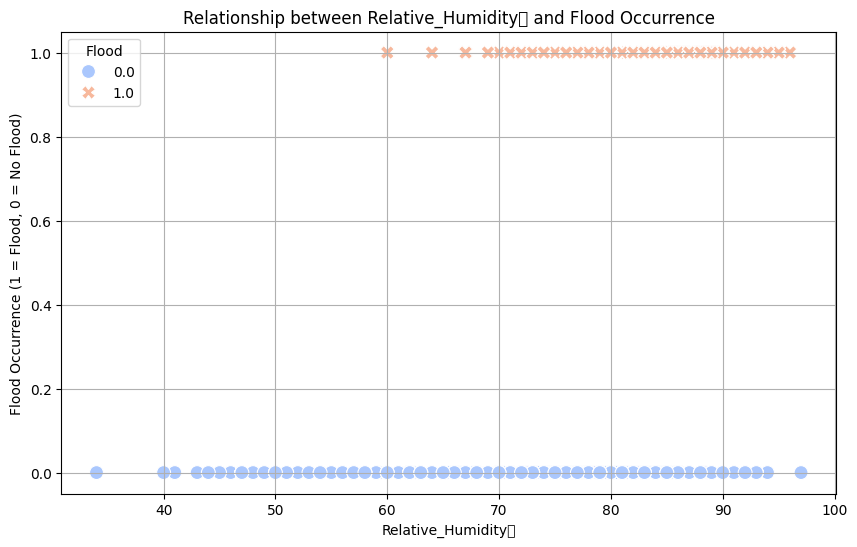

In [43]:
# Plot the relationship between Rainfall and Flood occurrence
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Relative_Humidity', y='Flood?', hue='Flood?', style='Flood?', s=100, palette='coolwarm')
plt.title('Relationship between Relative_Humidity	 and Flood Occurrence')
plt.xlabel('Relative_Humidity	')
plt.ylabel('Flood Occurrence (1 = Flood, 0 = No Flood)')
plt.legend(title='Flood')
plt.grid(True)
plt.show()

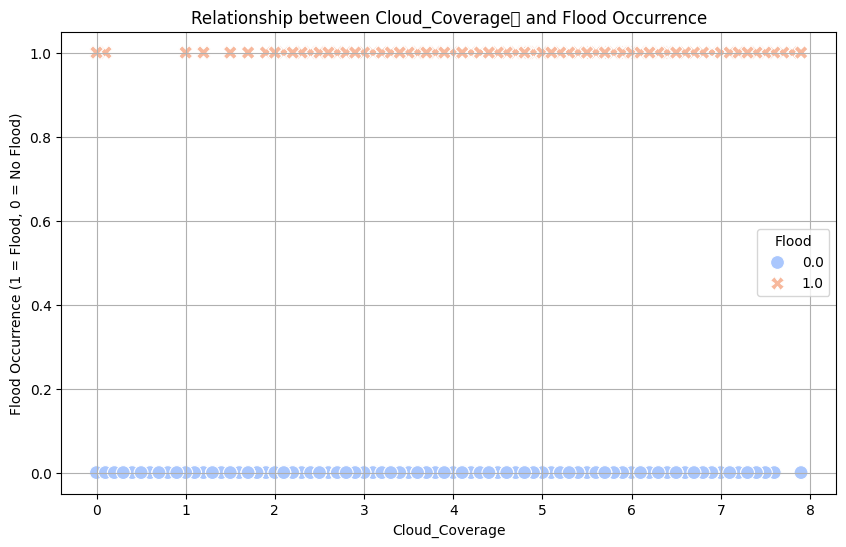

In [44]:
# Plot the relationship between Rainfall and Flood occurrence
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Cloud_Coverage', y='Flood?', hue='Flood?', style='Flood?', s=100, palette='coolwarm')
plt.title('Relationship between Cloud_Coverage	 and Flood Occurrence')
plt.xlabel('Cloud_Coverage')
plt.ylabel('Flood Occurrence (1 = Flood, 0 = No Flood)')
plt.legend(title='Flood')
plt.grid(True)
plt.show()

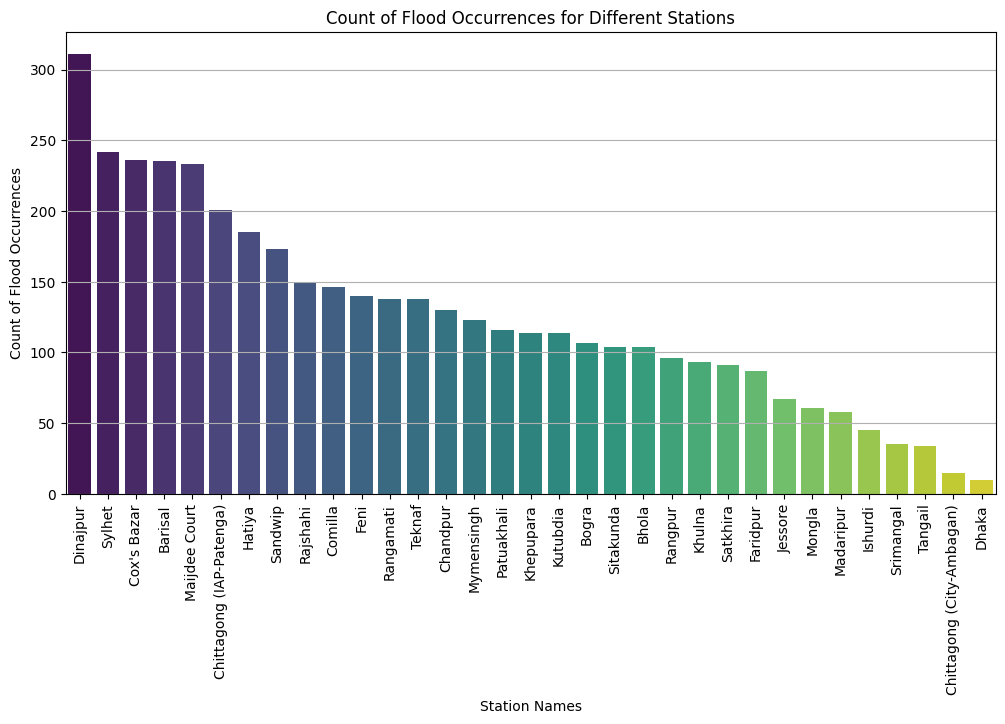

In [46]:
# Count the number of flood occurrences for each station
flood_counts = df[df['Flood?'] == 1]['Station_Names'].value_counts().reset_index()
flood_counts.columns = ['Station_Names', 'Flood_Count']

# Plot the count of flood occurrences for each station
plt.figure(figsize=(12, 6))
sns.barplot(x='Station_Names', y='Flood_Count', data=flood_counts, palette='viridis')
plt.title('Count of Flood Occurrences for Different Stations')
plt.xlabel('Station Names')
plt.ylabel('Count of Flood Occurrences')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

In [53]:
# Identify columns to drop
columns_to_drop = ['Sl', 'Year', 'Station_Names', 'X_COR', 'Y_COR', 'Max_Temp', 'Min_Temp', 'Bright_Sunshine', 'Wind_Speed', 'LATITUDE', 'LONGITUDE', 'ALT']

# Drop the unnecessary columns
new_df = df.drop(columns=columns_to_drop)

In [54]:
new_df

,Month,Rainfall,Relative_Humidity,Cloud_Coverage,Station_Number,Period,Flood?
0,1,0.0,68.0,0.6,41950,1949.01,0.0
1,2,9.0,63.0,0.9,41950,1949.02,0.0
2,3,8.0,59.0,1.5,41950,1949.03,0.0
3,4,140.0,71.0,3.9,41950,1949.04,0.0
4,5,217.0,76.0,4.1,41950,1949.05,0.0
...,...,...,...,...,...,...,...
20539,8,851.0,88.0,6.2,41998,2013.08,1.0
20540,9,329.0,88.0,6.1,41998,2013.09,0.0
20541,10,271.0,85.0,4.4,41998,2013.10,0.0
20542,11,0.0,79.0,1.7,41998,2013.11,0.0


In [62]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

#Splitting the dataset into training & testing data
x, y = new_df[['Month', 'Rainfall', 'Relative_Humidity',
       'Cloud_Coverage', 'Period', 'Station_Number']], new_df[['Flood?']]

# Initialize MinMaxScaler
minmax = MinMaxScaler()

# Fit and transform x
x_scaled = minmax.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

## Prediction Algorithm

### 1. KNN Classifier


In [109]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score,precision_score,recall_score,f1_score, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import average_precision_score,roc_auc_score, roc_curve, precision_recall_curve


In [110]:
# Initialize classifiers
models = {
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

In [103]:
# #########  Classifiers Defination  #########
# def ml_models_defination():
#     """
#     This function consists the models defination for All gram Features

#     Retuns:
#         ml_models: list of models
#         model_names: list of model_names

#     """


#     dt_model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
#     rf_model = RandomForestClassifier(n_estimators=100, criterion ='entropy', random_state = 0)
#     mnb_model = MultinomialNB(alpha=0.15)
#     knn_model = KNeighborsClassifier(n_neighbors=3, metric = 'minkowski')
#     lsvm_model = SVC(kernel = 'linear', C = 0.2, probability=True, random_state = 0)
#     ksvm_model = SVC(C= 1000,kernel = 'rbf',probability=True, gamma = 0.00015, random_state = 0)
#     sgd_model = SGDClassifier(loss='log', random_state=0)

#     model_names = ['Decision Tree','Random Forest','Naive Bayes','KNN','Linear SVM','Kernel SVM', 'SGD Classifier']

#     # Create list of models
#     ml_models = [dt_model,rf_model,mnb_model,knn_model,lsvm_model,ksvm_model, sgd_model]
#     #ml_models = [lr_model]
#     return ml_models, model_names

In [104]:
# ####### Model Evaluation Function ############

# def model_performace(model,X_train,X_test,y_train,y_test):
#     """
#     This function will return the performance parameter values of each ML models.
#     Performance parameters are Accuracy, F1-Score, Precision, Recall.

#     Args:
#         model: a ML model instance
#         X_train: training feature vector (sparse matrix)
#         X_test : testing feature vector (sparse matrix)
#         y_train: training encoded labels (array)
#         y_test : testing encoded labels (array)

#     Returns:
#         my_dict: a dictionary of all the parameters for each models
#     """
#     my_dict = {}
#     model.fit(X_train,y_train)
#     # Prediction
#     pred_y = model.predict(X_test)
#     my_dict['Accuracy'] = round(accuracy_score(y_test, pred_y),4)*100
#     my_dict['Precision'] = round(precision_score(y_test, pred_y, average='micro'),4)*100 # try for ---> average='macro'
#     my_dict['Recall'] = round(recall_score(y_test, pred_y, average='micro'),4)*100 # try for ---> average='macro'
#     my_dict['F1 Score'] = round(f1_score(y_test, pred_y, average='micro'),4)*100 # try for ---> average='macro'

#      # Plot confusion matrix manually
#     cm = confusion_matrix(y_test, pred_y)
#     plt.figure(figsize=(6, 6))
#     sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
#     plt.xlabel('Predicted Labels')
#     plt.ylabel('True Labels')
#     plt.title(f'Confusion Matrix for {type(model).__name__}')
#     plt.show()

#     return my_dict

In [105]:
# #### Model Performane into Dataframe #####
# def performance_table(performance_dict):
#     """
#     This function will create a dataframe of all the performance parameters.

#     Args:
#         performance_dict: a dictionary of all the parameters for each models

#     Returns:
#         performance_df: a dataframe
#     """

#     acc_list = []
#     pr_list = []
#     re_list = []
#     f1_list = []
#     for i in performance_dict.keys():
#         acc_list.append(performance_dict[i]['Accuracy'])
#         pr_list.append(performance_dict[i]['Precision'])
#         re_list.append(performance_dict[i]['Recall'])
#         f1_list.append(performance_dict[i]['F1 Score'])

#     # Create a dataframe
#     model_names = ['DT','RF','MNB','KNN','Linear SVM','RBF SVM', 'SGD']
#     performance_df = pd.DataFrame({'Accuracy':acc_list,'Precision':pr_list,
#                                    'Recall':re_list,'F1 Score':f1_list,
#                                    'Model Name':model_names })



#     return performance_df

KNN Metrics:
Accuracy: 0.94
Precision: 0.86
Recall: 0.85
F1 Score: 0.85



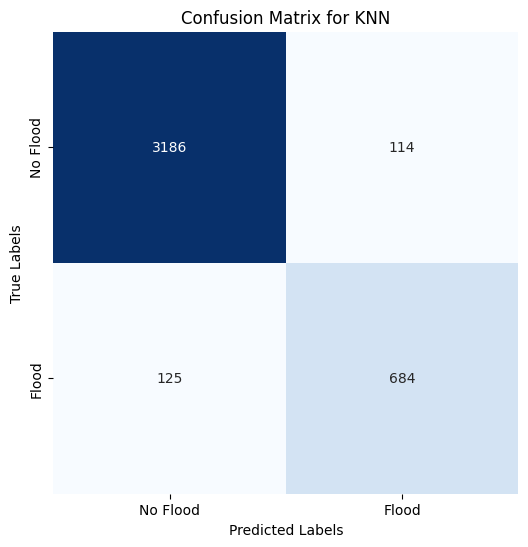

Random Forest Metrics:
Accuracy: 0.97
Precision: 0.94
Recall: 0.91
F1 Score: 0.93



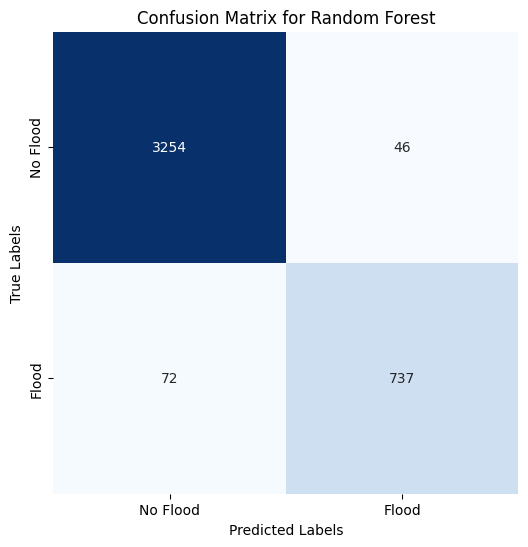

Naive Bayes Metrics:
Accuracy: 0.85
Precision: 0.57
Recall: 0.93
F1 Score: 0.70



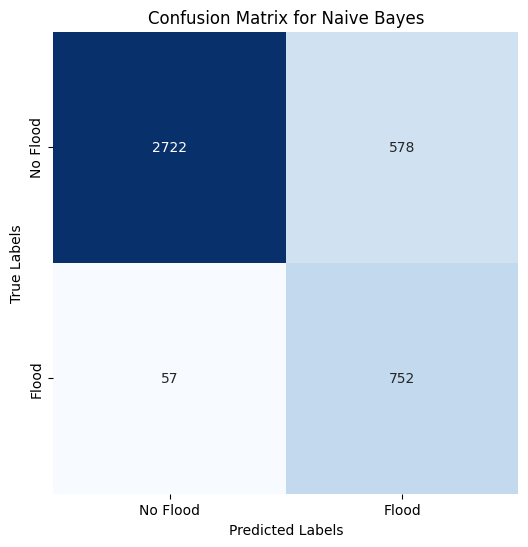

SVM Metrics:
Accuracy: 0.94
Precision: 0.86
Recall: 0.86
F1 Score: 0.86



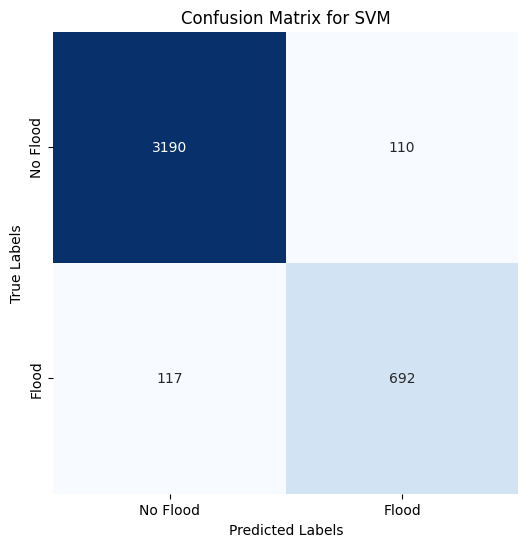

Decision Tree Metrics:
Accuracy: 0.96
Precision: 0.89
Recall: 0.90
F1 Score: 0.90



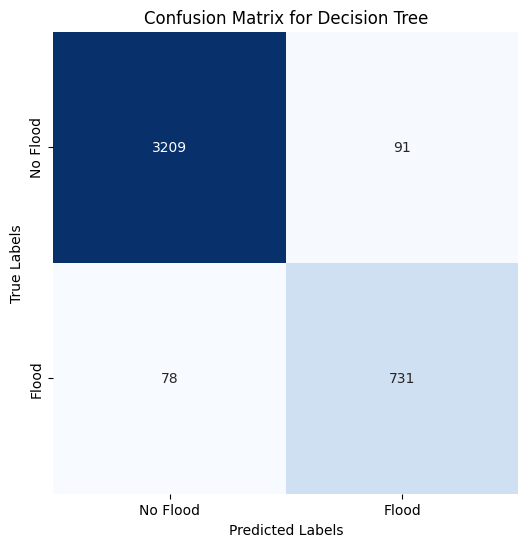

Gradient Boosting Metrics:
Accuracy: 0.97
Precision: 0.94
Recall: 0.92
F1 Score: 0.93



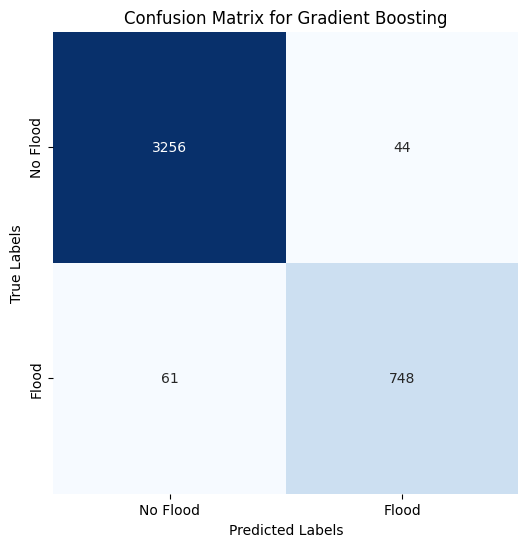

In [112]:
# Train and evaluate each model
for name, model in models.items():
    model.fit(x_train, y_train)  # Train the model
    y_pred = model.predict(x_test)  # Predict on test data
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
    precision = precision_score(y_test, y_pred)  # Calculate precision
    recall = recall_score(y_test, y_pred)  # Calculate recall
    f1 = f1_score(y_test, y_pred)  # Calculate F1 score

    print(f"{name} Metrics:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print()


    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['No Flood', 'Flood'], yticklabels=['No Flood', 'Flood'])
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix for {name}')
    plt.show()

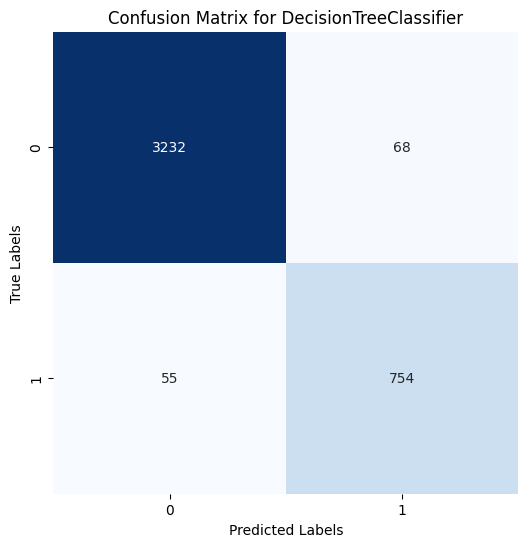

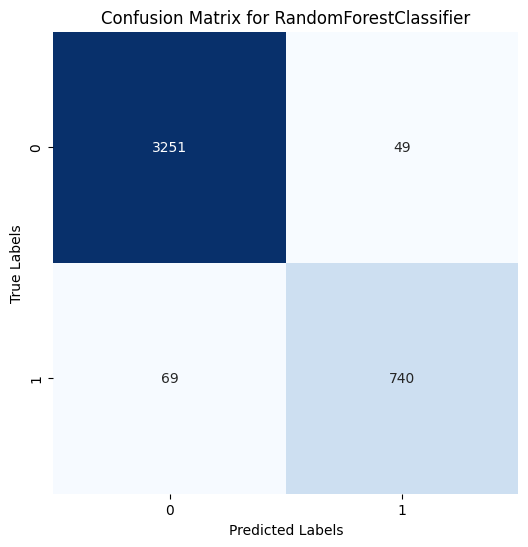

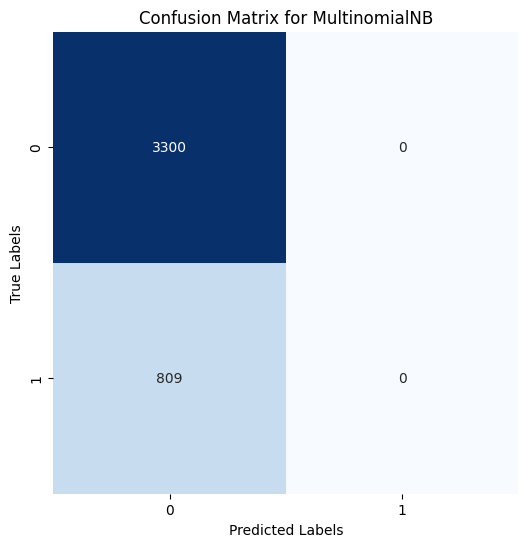

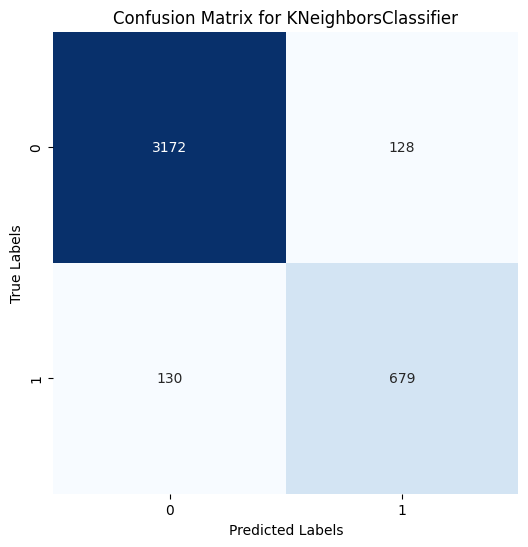

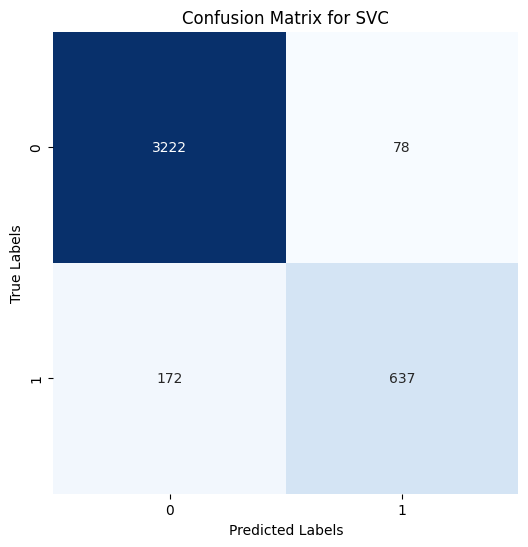

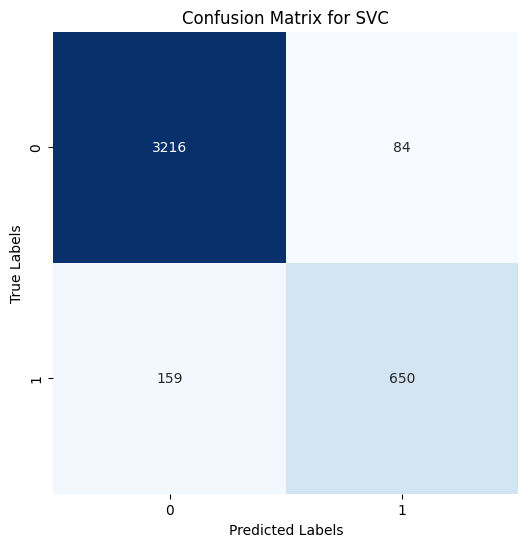

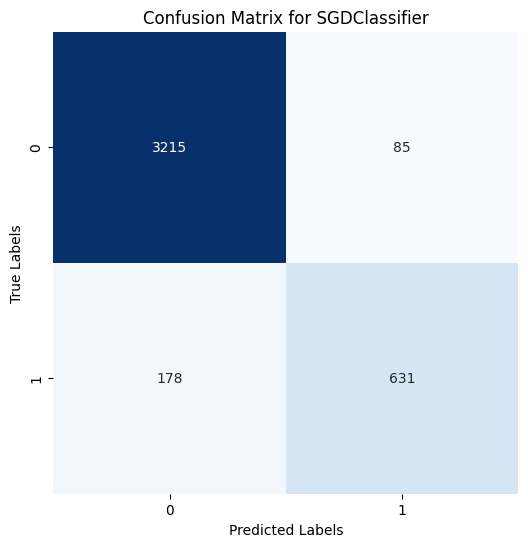

In [106]:
# acc = {}
# ml_models,model_names = ml_models_defination()
# # call model accuracy function and save the metrices into a dictionary
# accuracy = {f'{model_names[j]}': model_performace(model,x_train,x_test,y_train,y_test) for j,model in enumerate(ml_models)}
# acc = accuracy

In [107]:
# table = performance_table(accuracy)
# print(f"\n========== Performace Table:========\n",table)
# print(f"Highest Accuracy achieved by {table['Model Name'][table.Accuracy.idxmax(axis = 0)]} at = {max(table.Accuracy)}")
# print(f"Highest F1-Score achieved by {table['Model Name'][table['F1 Score'].idxmax(axis = 0)]} at = {max(table['F1 Score'] )}")
# print(f"Highest Precision Score achieved by {table['Model Name'][table['Precision'].idxmax(axis = 0)]} at = {max(table['Precision'] )}")
# print(f"Highest Recall Score achieved by {table['Model Name'][table['Recall'].idxmax(axis = 0)]} at = {max(table['Recall'] )}")


========== Performace Table:========
    Accuracy  Precision  Recall  F1 Score  Model Name
0     97.01      97.01   97.01     97.01          DT
1     97.13      97.13   97.13     97.13          RF
2     80.31      80.31   80.31     80.31         MNB
3     93.72      93.72   93.72     93.72         KNN
4     93.92      93.92   93.92     93.92  Linear SVM
5     94.09      94.09   94.09     94.09     RBF SVM
6     93.60      93.60   93.60     93.60         SGD
Highest Accuracy achieved by RF at = 97.13000000000001
Highest F1-Score achieved by RF at = 97.13000000000001
Highest Precision Score achieved by RF at = 97.13000000000001
Highest Recall Score achieved by RF at = 97.13000000000001
